<a href="https://colab.research.google.com/github/630kiran/630kiran/blob/main/Student_performance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataFrame shape: (1000, 8)
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
Missing values per column:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch

/tmp/ipython-input-310893485.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(subject_averages.keys()),


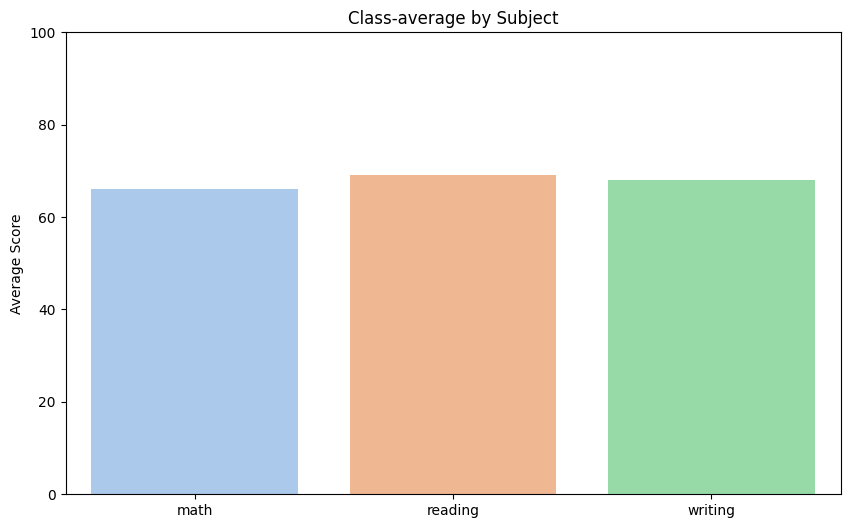

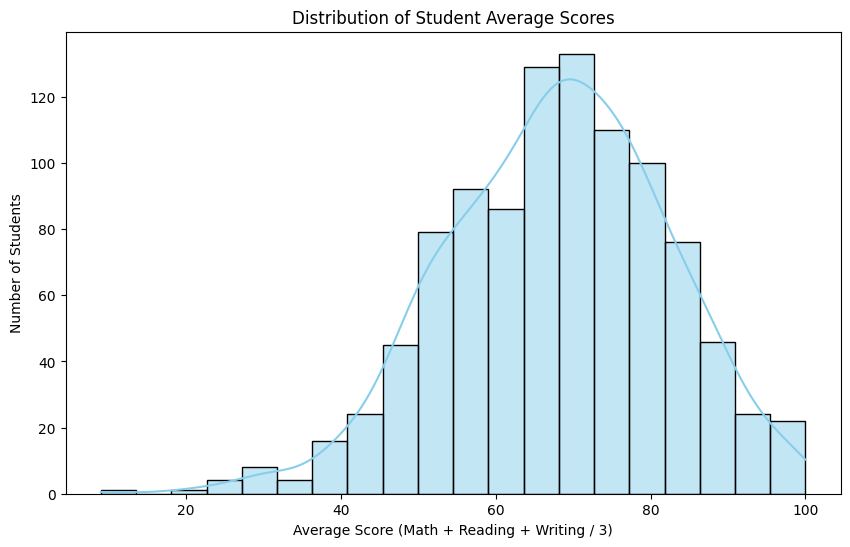

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("StudentsPerformance.csv")  # adjust path if needed

# Display basic info
print("DataFrame shape:", df.shape)
print(df.head())

# Data validation
# Check missing values
print("Missing values per column:\n", df.isnull().sum())

# Optionally: if there are missing values, you can drop or fill them
# For this dataset, it's known there are no missing values. :contentReference[oaicite:1]{index=1}

# Check for negative or invalid marks (assuming scores should be between 0 and 100)
for subj in ["math score", "reading score", "writing score"]:
    if (df[subj] < 0).any() or (df[subj] > 100).any():
        raise ValueError(f"Invalid values detected in {subj}")

# Compute average marks per subject (class-level average)
subject_averages = {
    "math": df["math score"].mean(),
    "reading": df["reading score"].mean(),
    "writing": df["writing score"].mean()
}
print("Subject-wise averages:")
for subj, avg in subject_averages.items():
    print(f"  {subj.capitalize()}: {avg:.2f}")

# Compute per-student average (across the three subjects), add as new column
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

# Identify top 5 performing students (by average)
top_5 = df.sort_values(by="average_score", ascending=False).head(5)
print("\nTop 5 students (by overall average score):")
print(top_5[["gender", "race/ethnicity", "parental level of education",
             "math score", "reading score", "writing score", "average_score"]])

# Visualization

plt.figure(figsize=(10,6))
# Bar chart for subject-wise class-average
sns.barplot(x=list(subject_averages.keys()),
            y=list(subject_averages.values()),
            palette="pastel")
plt.title("Class-average by Subject")
plt.ylabel("Average Score")
plt.ylim(0, 100)
plt.show()

# Histogram of overall average_score distribution
plt.figure(figsize=(10,6))
sns.histplot(df["average_score"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Student Average Scores")
plt.xlabel("Average Score (Math + Reading + Writing / 3)")
plt.ylabel("Number of Students")
plt.show()
